In [1]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
#import scikitplot as skl
sns.set()

In [2]:
data = pd.read_csv("D:\ineuron\projects\Logistic-regression_final (2)\Logistic-regression_final\diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.shape

(768, 9)

data description:
The following features have been provided to help us predict whether a person is diabetic or not:

1)Pregnancies: Number of times pregnant

2)Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test

general info :
--------------------
Before glucose intake (fasting): 5.3 mmol/L (95 mg/dL)
1 hour after drinking the glucose solution: 10.0 mmol/L (180 mg/dL)
2 hours: 8.6 mmol/L (155 mg/dL)
3 hours: 7.8 mmol/L (140 mg/dL)

3)BloodPressure: Diastolic blood pressure (mm Hg)

general info:
-------------------
ideal blood pressure is considered to be between 90/60mmHg and 120/80mmHg. high blood pressure is considered to be 140/90mmHg or higher. low blood pressure is considered to be 90/60mmHg or lower.

4)SkinThickness: Triceps skin fold thickness (mm) 
general info:
-------------------
makes skin thinner

5)Insulin: 2-Hour serum insulin (mu U/ml)

6)BMI: Body mass index (weight in kg/(height in m)2)

7)DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)

8)Age: Age (years)

9)Outcome: Class variable (0 if non-diabetic, 1 if diabetic)



In [6]:
# no null values 
# go for replacing 0's

In [7]:
data[data['SkinThickness']==0]['SkinThickness'].count()

227

In [8]:
data[data['Insulin']==0]['Insulin'].count()

374

In [37]:
data[data['Glucose']==0]['Glucose'].count()

5

In [38]:
data[data['BloodPressure']==0]['BloodPressure'].count()

35

In [39]:
data[data['BMI']==0]['BMI'].count()

11

In [9]:
data['SkinThickness'].mean()

20.536458333333332

In [10]:
data['SkinThickness'].median()

23.0

In [11]:
data['Insulin'].mean()

79.79947916666667

In [12]:
data['Insulin'].median()

30.5

In [40]:
data['Glucose'].mean()

120.89453125

In [41]:
data['Glucose'].median()

117.0

In [42]:
data['BloodPressure'].mean()

69.10546875

In [43]:
data['BloodPressure'].median()

72.0

In [44]:
data['BMI'].mean()

31.992578124999977

In [45]:
data['BMI'].median()

32.0

In [13]:
# we can replace skin thickness either by mean or median as both are similar
# but Insulin level has some difference b/w mean and median

In [14]:
data['Insulin'].max()

846

In [48]:
## df has replaced 0's of skinthickness and insulin
df = data

In [51]:
df['Glucose_replaced'] = df['Glucose'].replace(0,df['Glucose'].mean())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,replaced_skin_thickness,replaced_insulin,Glucose_replaced
0,6,148,72,35,0,33.6,0.627,50,1,35.000000,79.799479,148.0
1,1,85,66,29,0,26.6,0.351,31,0,29.000000,79.799479,85.0
2,8,183,64,0,0,23.3,0.672,32,1,20.536458,79.799479,183.0
3,1,89,66,23,94,28.1,0.167,21,0,23.000000,94.000000,89.0
4,0,137,40,35,168,43.1,2.288,33,1,35.000000,168.000000,137.0


In [52]:
df['BloodPressure_replaced']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,replaced_skin_thickness,replaced_insulin,Glucose_replaced,BloodPressure_replaced
0,6,148,72,35,0,33.6,0.627,50,1,35.000000,79.799479,148.0,72.0
1,1,85,66,29,0,26.6,0.351,31,0,29.000000,79.799479,85.0,66.0
2,8,183,64,0,0,23.3,0.672,32,1,20.536458,79.799479,183.0,64.0
3,1,89,66,23,94,28.1,0.167,21,0,23.000000,94.000000,89.0,66.0
4,0,137,40,35,168,43.1,2.288,33,1,35.000000,168.000000,137.0,40.0


In [53]:
df['BMI_replaced'] = df['BMI'].replace(0,df['BMI'].mean())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,replaced_skin_thickness,replaced_insulin,Glucose_replaced,BloodPressure_replaced,BMI_replaced
0,6,148,72,35,0,33.6,0.627,50,1,35.000000,79.799479,148.0,72.0,33.6
1,1,85,66,29,0,26.6,0.351,31,0,29.000000,79.799479,85.0,66.0,26.6
2,8,183,64,0,0,23.3,0.672,32,1,20.536458,79.799479,183.0,64.0,23.3
3,1,89,66,23,94,28.1,0.167,21,0,23.000000,94.000000,89.0,66.0,28.1
4,0,137,40,35,168,43.1,2.288,33,1,35.000000,168.000000,137.0,40.0,43.1


In [54]:
df['skin_thickness_replaced']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,replaced_skin_thickness,replaced_insulin,Glucose_replaced,BloodPressure_replaced,BMI_replaced,skin_thickness_replaced
0,6,148,72,35,0,33.6,0.627,50,1,35.000000,79.799479,148.0,72.0,33.6,35.000000
1,1,85,66,29,0,26.6,0.351,31,0,29.000000,79.799479,85.0,66.0,26.6,29.000000
2,8,183,64,0,0,23.3,0.672,32,1,20.536458,79.799479,183.0,64.0,23.3,20.536458
3,1,89,66,23,94,28.1,0.167,21,0,23.000000,94.000000,89.0,66.0,28.1,23.000000
4,0,137,40,35,168,43.1,2.288,33,1,35.000000,168.000000,137.0,40.0,43.1,35.000000


In [ ]:
df['replaced_insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df.head()

In [ ]:
df = df.drop(columns=['SkinThickness','Insulin','Glucose','BloodPressure','BMI'])

In [64]:
df = df.drop(columns=['replaced_skin_thickness'])
df.head()

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome,replaced_insulin,Glucose_replaced,BloodPressure_replaced,BMI_replaced,skin_thickness_replaced
0,6,0.627,50,1,79.799479,148.0,72.0,33.6,35.000000
1,1,0.351,31,0,79.799479,85.0,66.0,26.6,29.000000
2,8,0.672,32,1,79.799479,183.0,64.0,23.3,20.536458
3,1,0.167,21,0,94.000000,89.0,66.0,28.1,23.000000
4,0,2.288,33,1,168.000000,137.0,40.0,43.1,35.000000


In [21]:
## getting the feel of distributions

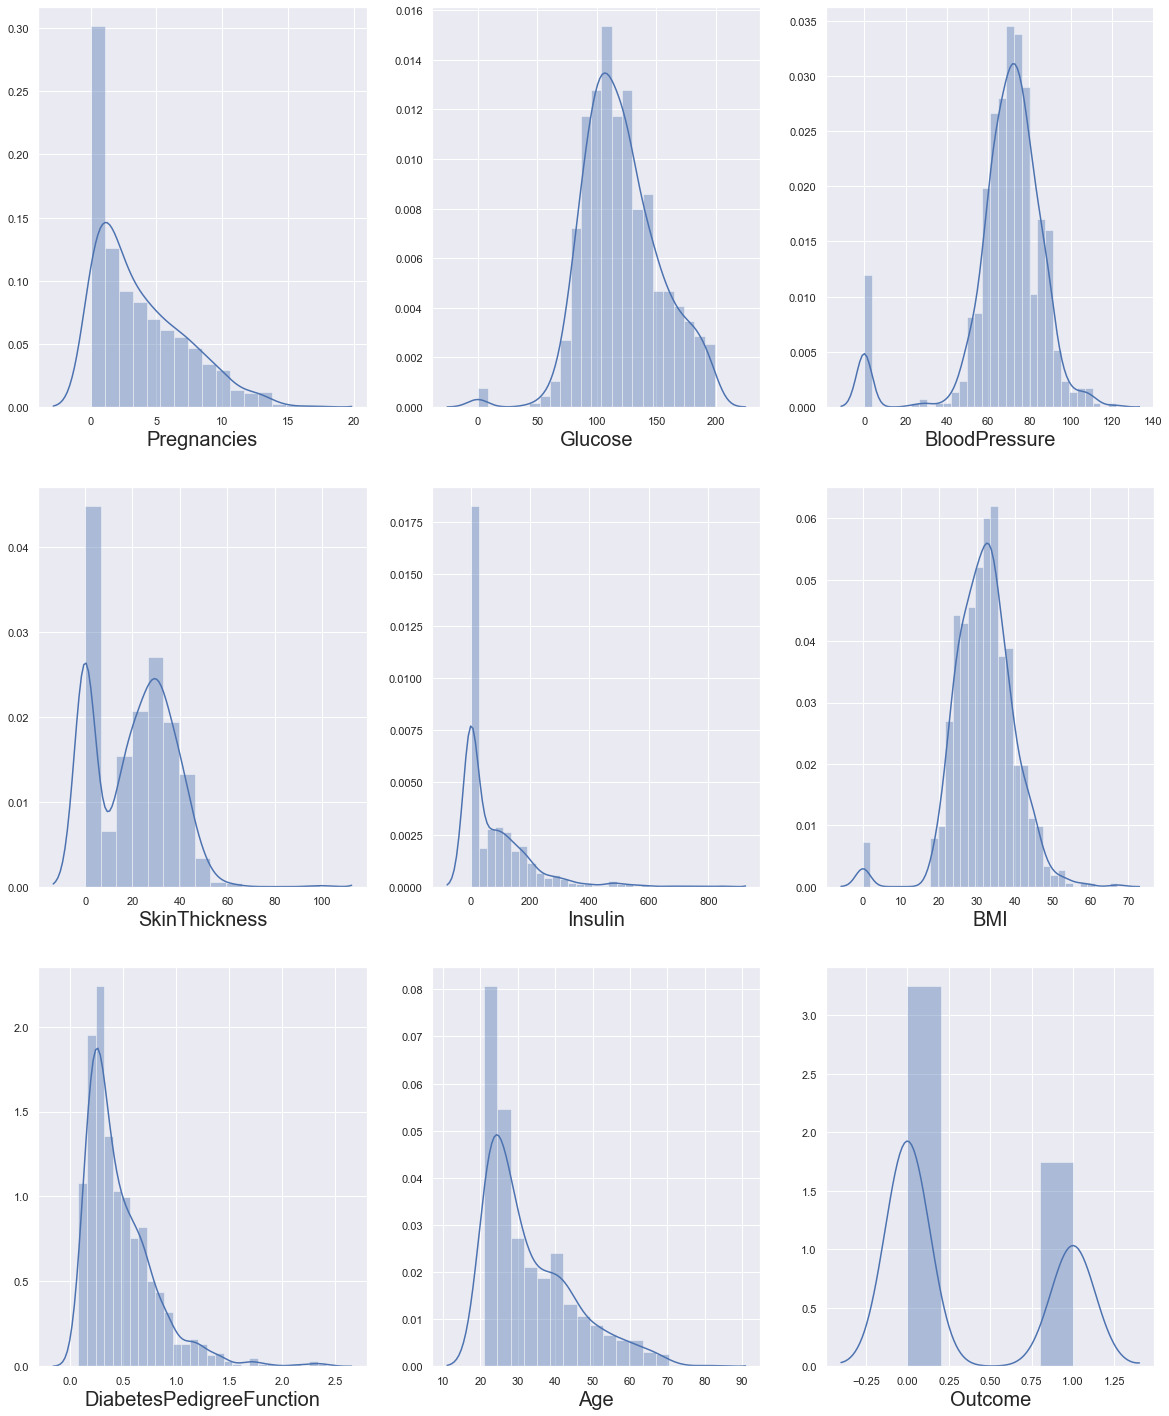

In [22]:
## on the data DF
plt.figure(figsize=(20,25))
plotnumber = 1
for col in data.columns:
    if plotnumber <=9:
        sns.distplot(data[col],ax=plt.subplot(3,3,plotnumber))
        plt.xlabel(col,fontsize=20)
        plotnumber+=1

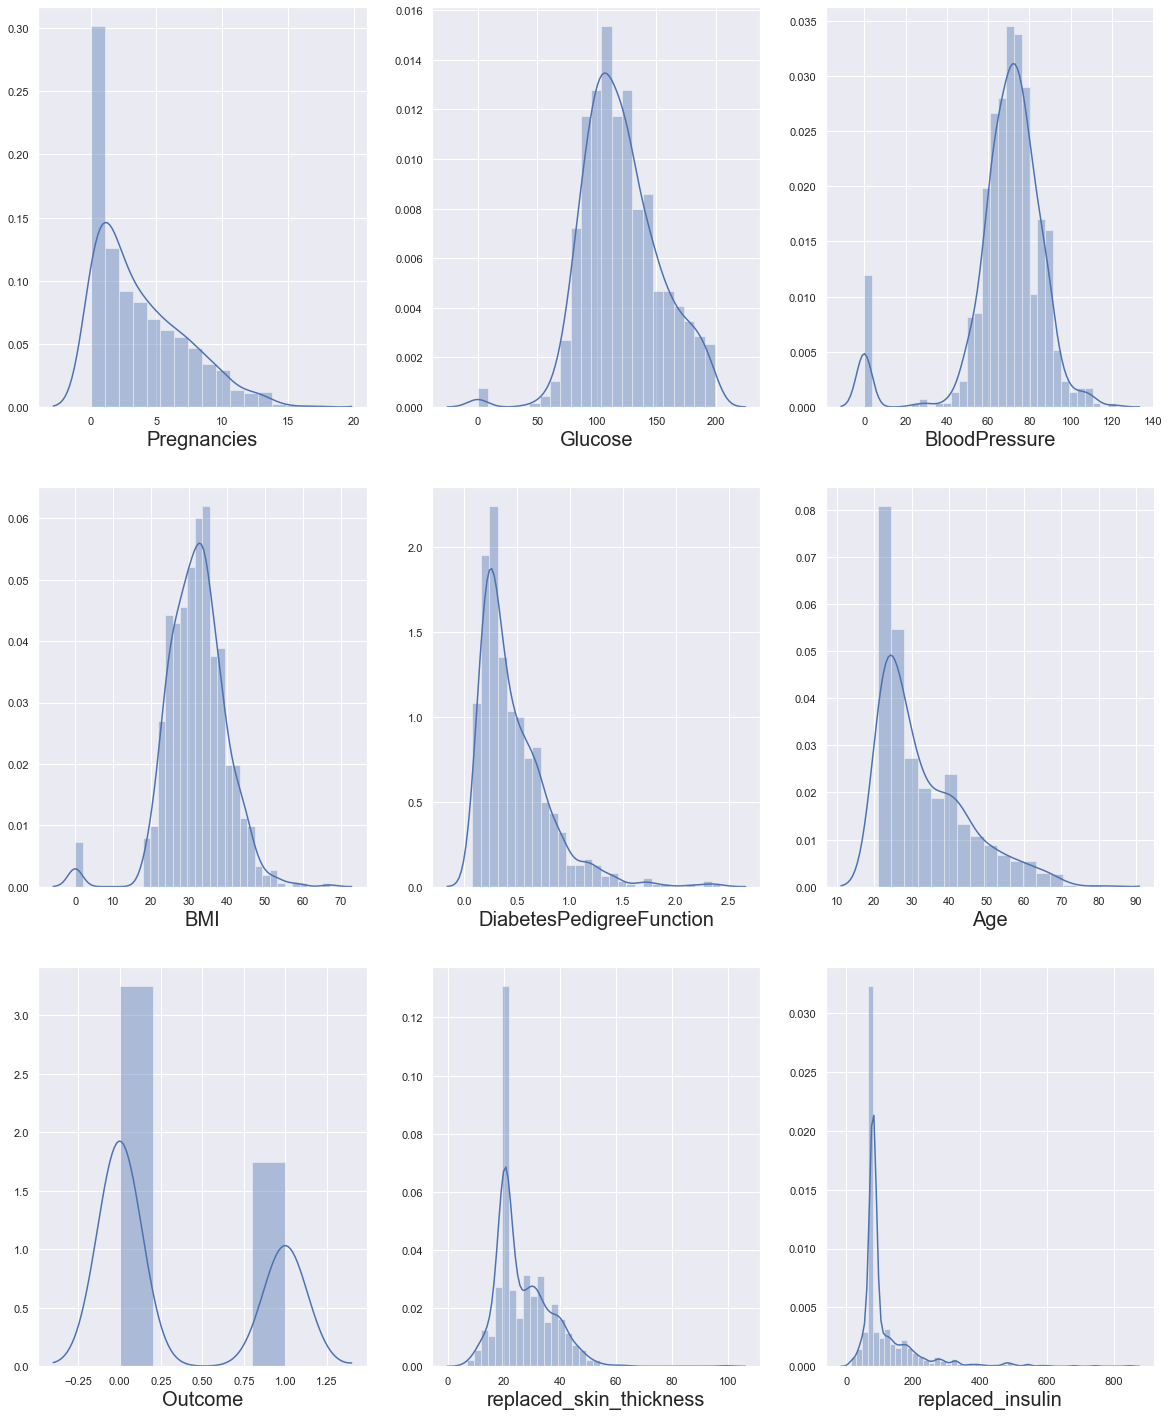

In [23]:
## on the df DF
plt.figure(figsize=(20,25))
plotnumber = 1
for col in df.columns:
    if plotnumber <=9:
        sns.distplot(df[col],ax=plt.subplot(3,3,plotnumber))
        plt.xlabel(col,fontsize=20)
        plotnumber+=1

In [67]:
## checking if the data is imbalanced or not
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [73]:
## checking for correlation
corr = df.corr()
corr

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome,replaced_insulin,Glucose_replaced,BloodPressure_replaced,BMI_replaced,skin_thickness_replaced
Pregnancies,1.000000,-0.033523,0.544341,0.221898,-0.018082,0.127964,0.208984,0.021546,0.013376
DiabetesPedigreeFunction,-0.033523,1.000000,0.033561,0.173844,0.157806,0.137106,0.000371,0.153508,0.154961
Age,0.544341,0.033561,1.000000,0.238356,0.038652,0.266600,0.326740,0.025748,0.026423
Outcome,0.221898,0.173844,0.238356,1.000000,0.179185,0.492908,0.162986,0.312254,0.175026
replaced_insulin,-0.018082,0.157806,0.038652,0.179185,1.000000,0.396597,0.010926,0.189856,0.240361
Glucose_replaced,0.127964,0.137106,0.266600,0.492908,0.396597,1.000000,0.219666,0.231478,0.160766
BloodPressure_replaced,0.208984,0.000371,0.326740,0.162986,0.010926,0.219666,1.000000,0.281231,0.134155
BMI_replaced,0.021546,0.153508,0.025748,0.312254,0.189856,0.231478,0.281231,1.000000,0.535703
skin_thickness_replaced,0.013376,0.154961,0.026423,0.175026,0.240361,0.160766,0.134155,0.535703,1.000000


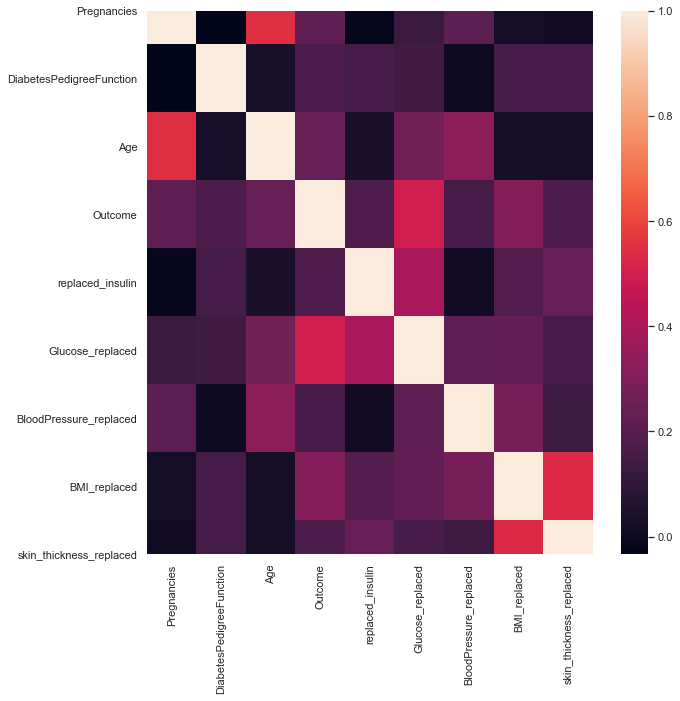

In [80]:
plt.figure(figsize = (10,10))
sns.heatmap(corr,
           xticklabels=df.columns,
           yticklabels=df.columns)

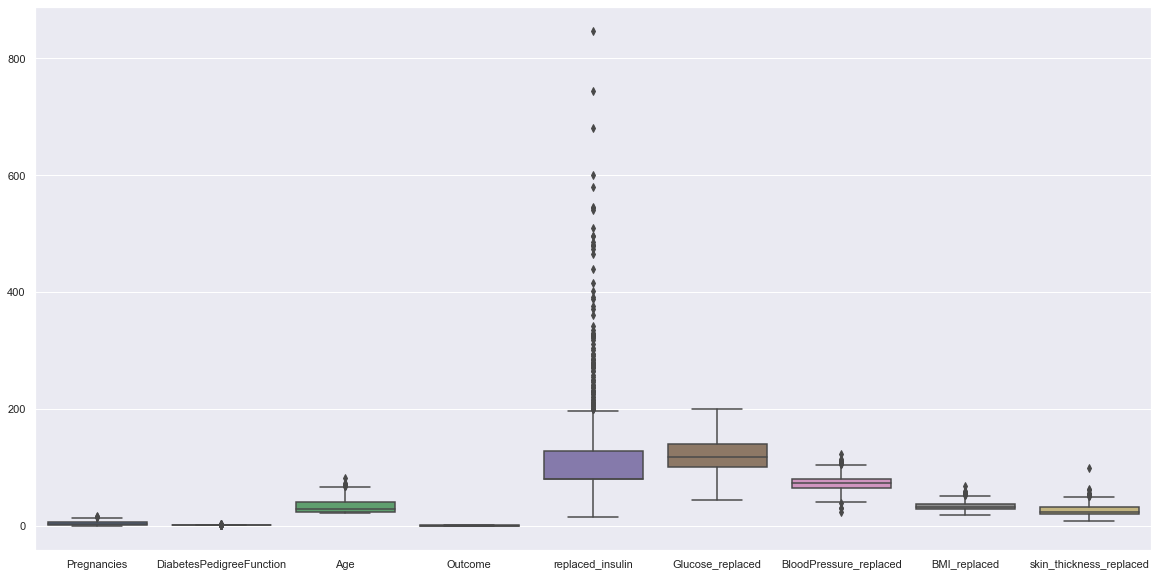

In [126]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

In [113]:
## dealing with the outliers
q = df['Pregnancies'].quantile(0.98)
cleaned_df = df[df['Pregnancies'] < q]
cleaned_df.shape

(745, 9)

In [114]:
cleaned_df = cleaned_df[cleaned_df['DiabetesPedigreeFunction'] < cleaned_df['DiabetesPedigreeFunction'].quantile(0.99)]
cleaned_df.shape

(737, 9)

In [130]:
cleaned_df = cleaned_df[cleaned_df['replaced_insulin'] < cleaned_df['replaced_insulin'].quantile(0.95)]
cleaned_df.shape

(692, 9)

In [133]:
cleaned_df = cleaned_df[cleaned_df['Glucose_replaced'] < cleaned_df['Glucose_replaced'].quantile(0.99)]
cleaned_df.shape

(684, 9)

In [135]:
cleaned_df = cleaned_df[cleaned_df['BloodPressure_replaced'] < cleaned_df['BloodPressure_replaced'].quantile(0.99)]
cleaned_df.shape

(675, 9)

In [138]:
cleaned_df = cleaned_df[cleaned_df['BMI_replaced'] < cleaned_df['BMI_replaced'].quantile(0.99)]
cleaned_df.shape

(668, 9)

In [141]:
cleaned_df = cleaned_df[cleaned_df['skin_thickness_replaced'] < cleaned_df['skin_thickness_replaced'].quantile(0.99)]
cleaned_df.shape

(661, 9)

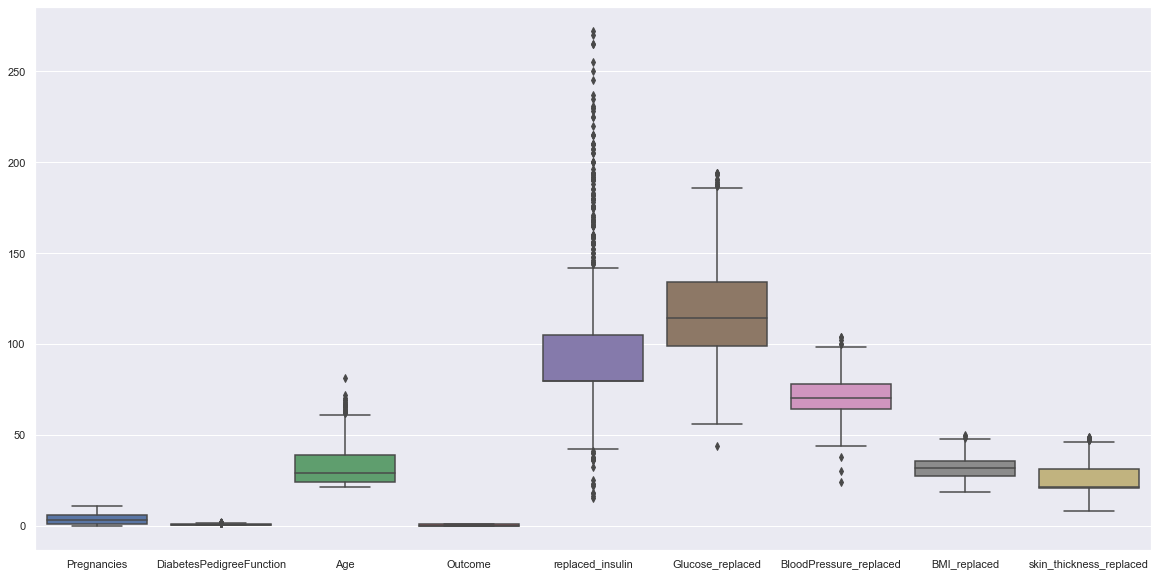

In [142]:
plt.figure(figsize=(20,10))
sns.boxplot(data=cleaned_df)

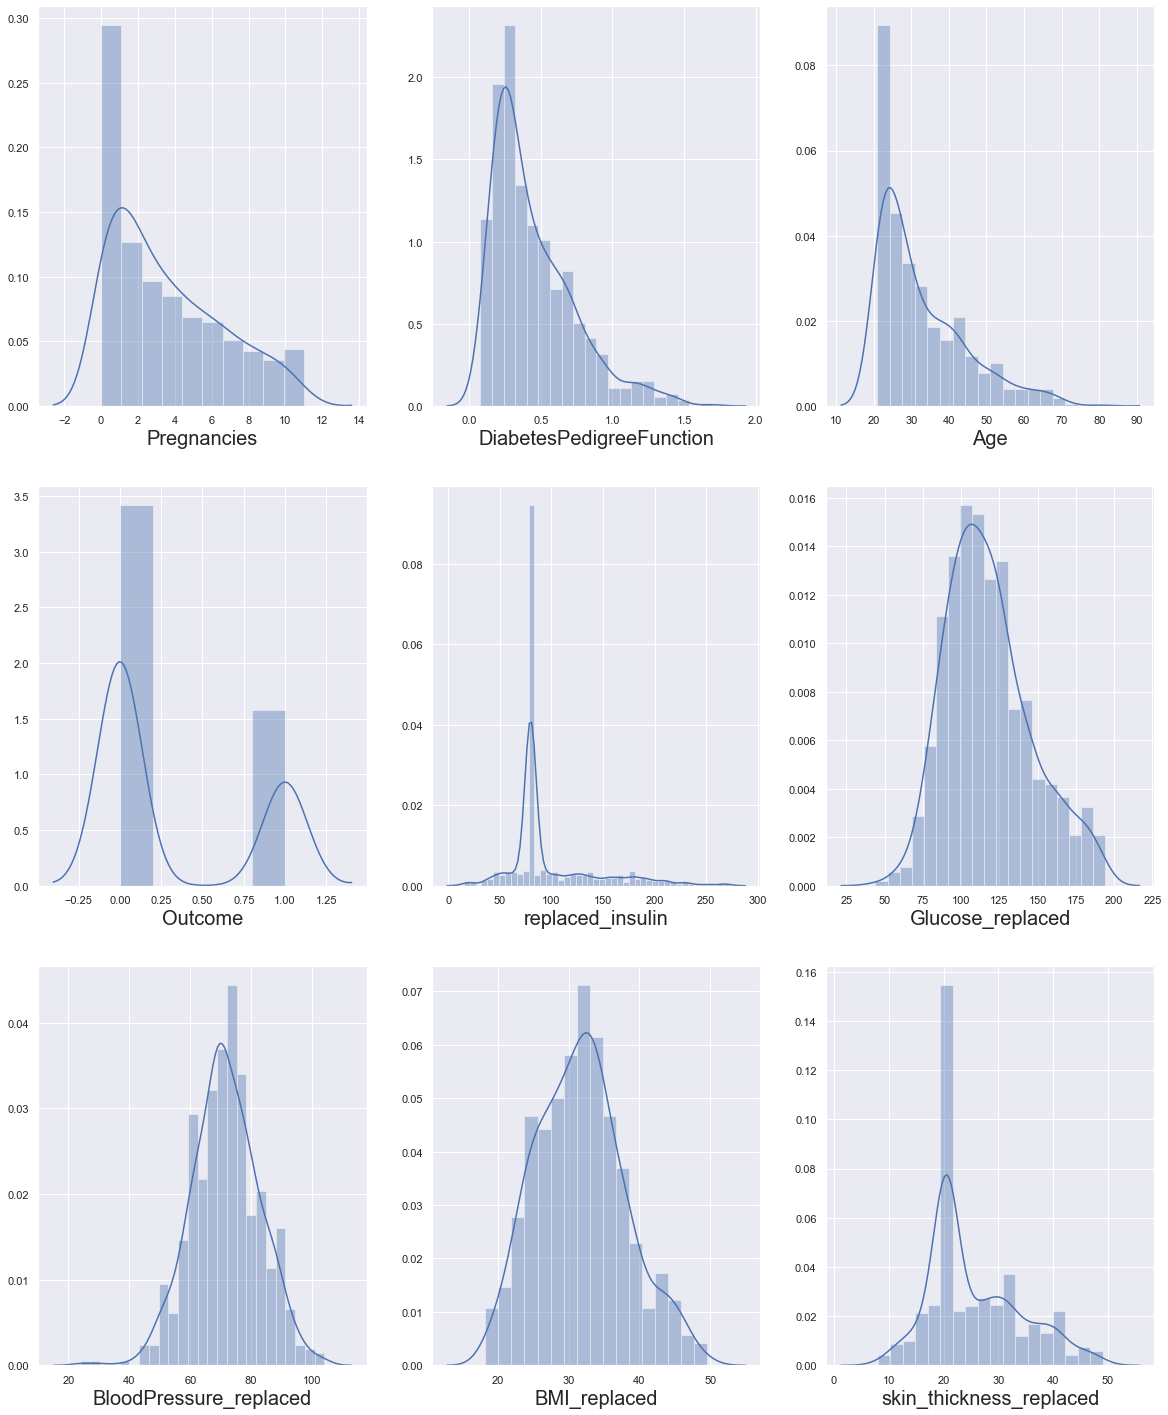

In [143]:
## getting the distribution after cleaning
## on the df DF
plt.figure(figsize=(20,25))
plotnumber = 1
for col in cleaned_df.columns:
    if plotnumber <=9:
        sns.distplot(cleaned_df[col],ax=plt.subplot(3,3,plotnumber))
        plt.xlabel(col,fontsize=20)
        plotnumber+=1

In [150]:
indep = cleaned_df.drop(columns=['Outcome'])
dep = cleaned_df['Outcome']

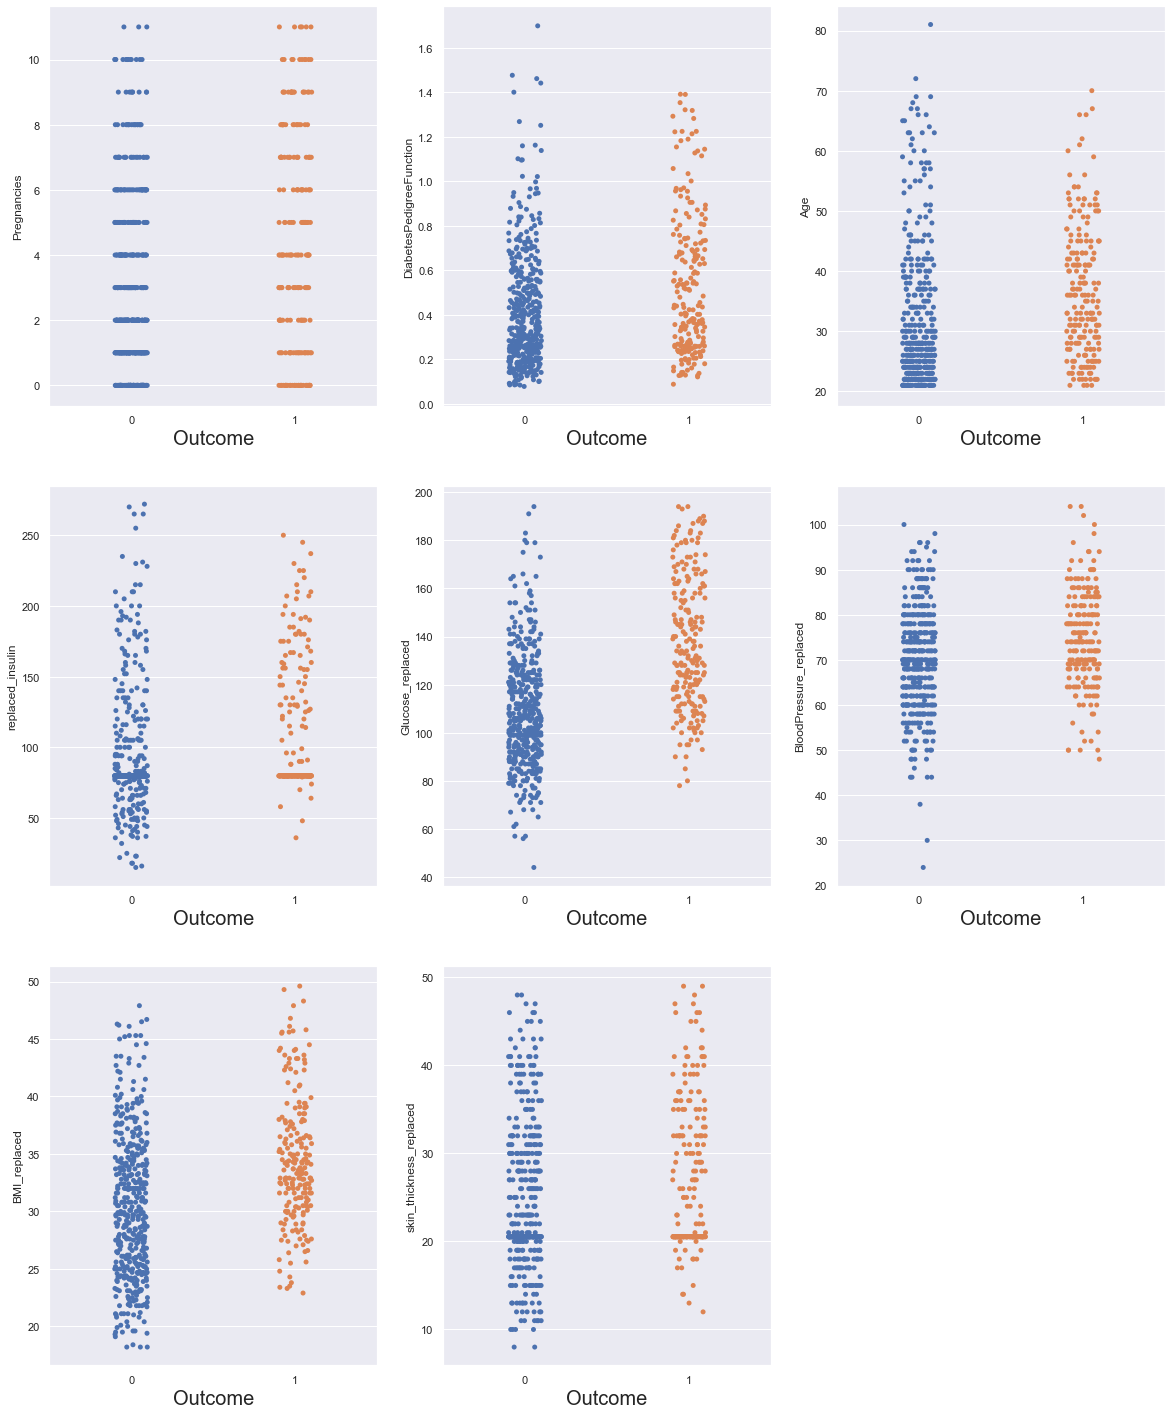

In [158]:
## getting the distribution after cleaning
## on the df DF
plt.figure(figsize=(20,25))
plotnumber = 1
for col in indep.columns:
    if plotnumber <=9:
        sns.stripplot(y=indep[col],x=dep,ax=plt.subplot(3,3,plotnumber))
        plt.xlabel('Outcome',fontsize=20)
        plotnumber+=1

In [160]:
## check for multicollinearity after scaling
scalar = StandardScaler()
indep_scaled = scalar.fit_transform(indep)
indep_scaled

array([[ 0.81211099,  0.62088523,  1.48569216, ...,  0.03896154,
         0.29989177,  1.12179344],
       [-0.86122244, -0.34332719, -0.15118896, ..., -0.49660515,
        -0.81261357,  0.40940916],
       [ 1.48144436,  0.77809378, -0.06503732, ..., -0.67512738,
        -1.33708038, -0.59547319],
       ...,
       [ 0.4774443 , -0.71364065, -0.23734059, ...,  0.03896154,
        -0.87618531, -0.30297513],
       [-0.86122244, -0.35031423,  1.22723725, ..., -1.03217184,
        -0.2563609 , -0.59547319],
       [-0.86122244, -0.46909403, -0.84040206, ..., -0.13956069,
        -0.2086821 ,  0.64687059]])

In [171]:
vif = pd.DataFrame()
vif['VIF_values'] = [ variance_inflation_factor(indep_scaled,i) for i in range(len(indep.columns))]
vif['columns'] = indep.columns

In [172]:
variance_inflation_factor(indep_scaled,2)

1.5734262675218902

In [173]:
vif

,VIF_values,columns
0,1.380276,Pregnancies
1,1.049409,DiabetesPedigreeFunction
2,1.573426,Age
3,1.275043,replaced_insulin
4,1.292766,Glucose_replaced
5,1.238939,BloodPressure_replaced
6,1.501131,BMI_replaced
7,1.488032,skin_thickness_replaced


All the VIF values are less than 5 and are very low. That means no multicollinearity. Now, we can go ahead with fitting our data to the model. Before that, let's split our data in test and training set.

In [174]:
x_train,x_test,y_train,y_test = train_test_split(indep_scaled,dep,test_size = 0.25,random_state = 255)

In [176]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(495, 8)
(166, 8)
(495,)
(166,)


In [177]:
logistic = LogisticRegression()
logistic.fit(x_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [188]:
y_pred = logistic.predict(x_test)

In [189]:
import pickle
with open("diabetes_predict.sav",'wb') as f:
    pickle.dump(logistic,f)
    
with open("scaler_diabetes.sav","wb") as f:
    pickle.dump(scalar,f)

In [191]:
## checking the accuracy
# measure-1
acc = accuracy_score(y_test,y_pred)
acc

0.8132530120481928

In [199]:
# measure-2 (confusion matrix)
cm = confusion_matrix(y_test,y_pred)
true_positive = cm[0][0]
true_negative = cm[1][1]
false_positive = cm[0][1]
false_negative = cm[1][0]
cm

array([[107,   9],
       [ 22,  28]], dtype=int64)

In [200]:
true_positive,true_negative,false_positive,false_negative

(107, 28, 9, 22)

In [201]:
## calculating accuracy based on confusion matrix
calc_acc = (true_positive+true_negative)/(true_positive+true_negative+false_negative+false_positive)
calc_acc

0.8132530120481928

In [202]:
#recall
recall = true_positive/(true_positive+false_negative)
recall

0.8294573643410853

In [203]:
#precision
precision = true_positive/(true_positive+false_positive)
precision

0.9224137931034483

In [204]:
#f1 score
f1 = 2*precision*recall/(precision+recall)
f1

0.8734693877551021

In [205]:
# AUC-ROC
auc_roc = roc_auc_score(y_test,y_pred)
auc_roc

0.7412068965517241

In [207]:
fpr, tpr, thresholds  = roc_curve(y_test,y_pred)

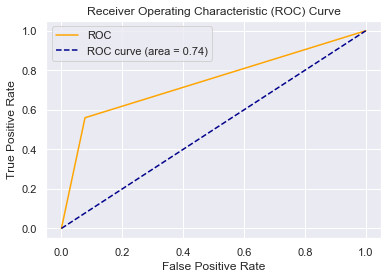

In [210]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_roc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [211]:
df.columns

Index(['Pregnancies', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'replaced_insulin', 'Glucose_replaced', 'BloodPressure_replaced',
       'BMI_replaced', 'skin_thickness_replaced'],
      dtype='object')